In [8]:
from __future__ import division
from numpy import array,linspace,random,warnings
from scipy.stats import bernoulli,norm
from matplotlib import cm
from matplotlib.pyplot import figure,subplots

In [6]:
ma_true = 4
mb_true = 7
fa = norm(ma_true,1)
fb = norm(mb_true,1)
fz = bernoulli(0.25)

def sample(n=10):
    tmp = fz.rvs(n)
    return tmp*(fb.rvs(n))+(1-tmp)*fa.rvs(n)
xs = sample(1000)

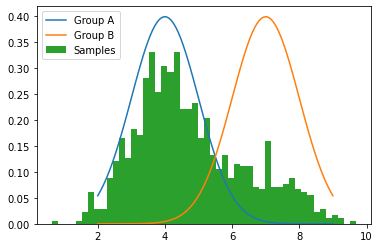

In [9]:
f,ax = subplots()
x = linspace(ma_true-2,mb_true+2,100)
ax.plot(x,fa.pdf(x),label = 'Group A')
ax.plot(x,fb.pdf(x),label = 'Group B')
ax.hist(xs,bins = 50,density =1,label = 'Samples')
ax.legend(loc = 0)

In [10]:
#Minimizing the expectation
import sympy
from sympy.abc import x,z
from sympy import stats

mu_a,mu_b = sympy.symbols('mu_a,mu_b')
na = stats.Normal('x',mu_a,1)
nb = stats.Normal('x',mu_b,1)

L = (stats.density(na)(x) + stats.density(nb)(x))/2

In [11]:
def ez(x,mu_a,mu_b):
    return norm(mu_a).pdf(x) /(norm(mu_a).pdf(x) + norm(mu_b).pdf(x))

Text(0.5, 1.0, 'Incomplete likelihood')

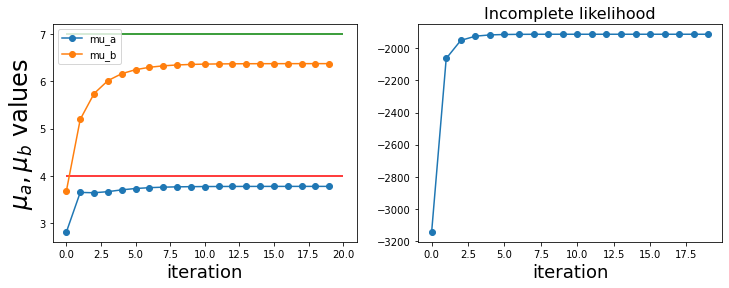

In [12]:
Lf = sympy.lambdify((x,mu_a,mu_b),sympy.log(abs(L)),'numpy')

def run():
    out,lout = [],[]
    mu_a_n = random.random()*10
    mu_b_n = random.random()*10
    for i in range(20):
        tau = ez(xs,mu_a_n,mu_b_n)
        lout.append(sum(Lf(xs,mu_a_n,mu_b_n)))
        out.append((mu_a_n,mu_b_n))
        mu_a_n = (sum(tau*xs)/sum(tau))
        mu_b_n = (sum((1-tau)*xs)/sum(1-tau))
    return out,lout

out,lout = run()
fig = figure()
fig.set_figwidth(12)
ax = fig.add_subplot(121)
ax.plot(array(out),'o-')
ax.legend(('mu_a','mu_b'),loc = 0)
ax.hlines([ma_true,mb_true],0,len(out),['r','g'])
ax.set_xlabel('iteration',fontsize = 18)
ax.set_ylabel('$\mu_a,\mu_b$ values',fontsize = 24)
ax = fig.add_subplot(122)
ax.plot(array(lout),'o-')
ax.set_xlabel('iteration',fontsize=18)
ax.set_title('Incomplete likelihood',fontsize = 16)

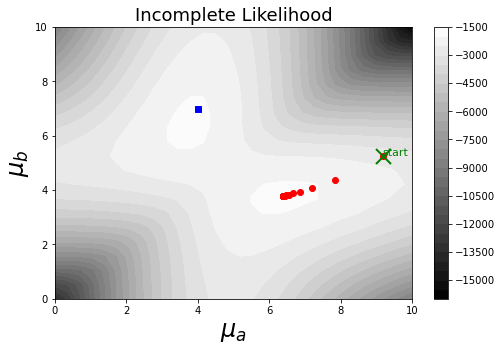

In [13]:
out,lout = run()
mua_step = linspace(0,10,30)
mub_step = linspace(0,10,20)
z = Lf(xs,mua_step[:,None],mub_step[:,None,None]).sum(axis = 2)
fig = figure(figsize=(8,5))
ax = fig.add_subplot(111)
p = ax.contourf(mua_step,mub_step,z,30,cmap=cm.gray)
xa,xb = zip(*out)
ax.plot(xa,xb,'ro')
ax.plot(ma_true,mb_true,'bs')
ax.plot(xa[0],xb[0],'gx',ms=15,mew=2.0)
ax.text(xa[0],xb[0],'start',color = 'g',fontsize=11.0)
ax.set_xlabel('$\mu_a$',fontsize=24)
ax.set_ylabel('$\mu_b$',fontsize=24)
ax.set_title('Incomplete Likelihood',fontsize = 18)
fig.colorbar(p)